In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,accuracy_score

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/nursnaaz/25DaysInMachineLearning/master/18%20-%20Day%20-%2018%20-%20Linear%20Regression%20Practise%20Python/Practise/Predict%20Cab%20price.csv')

In [5]:
data.shape

(60, 5)

In [6]:
data.head()

,miles,temp,rain,ncabs,price
0,1,30,0,10,20
1,1,38,0,5,40
2,1,25,0,1,50
3,1,20,1,10,50
4,1,15,1,4,80


C:\Users\91938\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp', ylabel='price'>

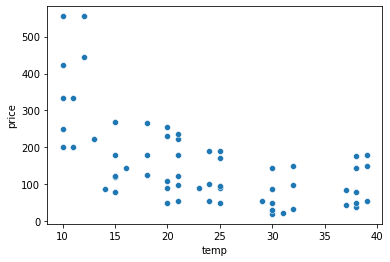

In [11]:
sns.scatterplot(data['temp'], data['price'])

C:\Users\91938\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rain', ylabel='price'>

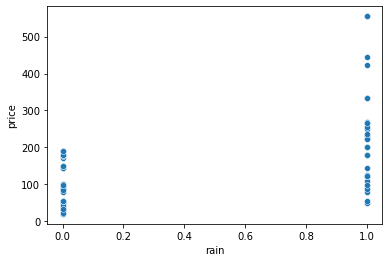

In [12]:
sns.scatterplot(data['rain'], data['price'])

C:\Users\91938\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp', ylabel='price'>

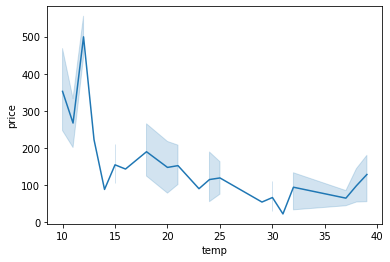

In [13]:
sns.lineplot(data['temp'], data['price'])

In [14]:
data['temp'].value_counts(dropna = False)

21    6
30    5
25    5
20    5
15    5
10    5
38    5
32    3
18    3
39    3
24    3
12    2
11    2
37    2
23    1
31    1
13    1
29    1
16    1
14    1
Name: temp, dtype: int64

In [15]:
data['rain'].value_counts(dropna = False)

0    30
1    30
Name: rain, dtype: int64

In [16]:
data['ncabs'].value_counts(dropna = False)

10    17
1     10
4     10
5      9
2      9
11     3
6      1
3      1
Name: ncabs, dtype: int64

In [17]:
data['price'].value_counts(dropna = False)

50     4
180    4
90     3
55     3
333    2
222    2
80     2
555    2
150    2
189    2
144    2
201    1
33     1
98     1
124    1
20     1
54     1
85     1
100    1
123    1
143    1
99     1
444    1
235    1
88     1
232    1
44     1
122    1
200    1
30     1
120    1
250    1
96     1
110    1
87     1
22     1
170    1
255    1
424    1
176    1
40     1
270    1
265    1
Name: price, dtype: int64

In [25]:
data['miles'].value_counts(dropna = False)

1    12
2    12
3    12
4    12
5    12
Name: miles, dtype: int64

In [26]:
one_hot = pd.get_dummies(data, columns = ['rain', 'ncabs', 'temp', 'miles'])

In [27]:
one_hot.head()

,price,rain_0,rain_1,ncabs_1,ncabs_2,ncabs_3,ncabs_4,ncabs_5,ncabs_6,ncabs_10,...,temp_31,temp_32,temp_37,temp_38,temp_39,miles_1,miles_2,miles_3,miles_4,miles_5
0,20,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,40,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
2,50,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,50,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4,80,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
x = one_hot.drop(columns = 'price')
y = one_hot['price']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 30)

In [33]:
model = LinearRegression()

In [34]:
model.fit(x_train, y_train)

LinearRegression()

In [35]:
model.coef_

array([-3.09303288e+01,  3.09303288e+01,  2.68245530e+00,  1.15909244e+02,
        3.96605545e+01, -1.73221224e+01, -3.20734330e+01,  1.42108547e-14,
       -4.54335919e+01, -6.34231064e+01,  4.04050008e+01,  4.32488290e+01,
        1.12860067e+02, -4.09440981e+01,  2.66453526e-14, -2.35272810e+01,
       -1.35198048e+01, -2.36181610e+01, -1.94621742e+01,  3.32489906e-01,
        2.14334813e+00, -2.43378676e+01, -1.99675637e+01, -1.25476776e+01,
       -2.25915058e+01,  2.91931476e+01, -3.89364398e+01,  5.09216354e+00,
        4.27829142e+00,  1.89923648e+00, -7.79951389e+01, -4.90509011e+01,
       -2.22438282e+01,  4.27599571e+01,  1.06529911e+02])

In [36]:
model.intercept_

165.1554265048607

In [37]:
y_pred = model.predict(x_train)

In [40]:
rmse = np.sqrt(mean_squared_error(y_train, y_pred))
rmse

24.09772897408942

In [43]:
r2_score = model.score(x_train, y_train)
r2_score

0.9651505293135803

In [44]:
model.fit(x_test, y_test)

LinearRegression()

In [45]:
model.coef_, model.intercept_

(array([-1.52585769e+01,  1.52585769e+01,  1.15724269e+01, -7.10542736e-15,
         1.42108547e-14,  1.97518001e+01,  9.65692503e-02, -2.39116900e+01,
         1.94184668e+01, -2.69275731e+01,  7.10542736e-15,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.39116900e+01, -1.71241000e+01,
         0.00000000e+00,  3.68759000e+01,  5.82092334e+01, -3.87907666e+01,
         0.00000000e+00,  0.00000000e+00,  1.15724269e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -2.69275731e+01,  0.00000000e+00,
        -2.45171537e+00,  2.54828463e+00, -2.39116900e+01, -4.23627700e+01,
         0.00000000e+00,  1.76372300e+01,  4.86372300e+01]),
 144.47649301143576)

In [47]:
y_pred_test = model.predict(x_test)

In [48]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse

0.28867513459481287

In [49]:
r2_score = model.score(x_test, y_test)
r2_score

0.9999791705360289